In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import Accuracy

from sklearn import metrics
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report,accuracy_score,roc_curve,confusion_matrix

In [ ]:
# Load the training dataset
instagram_df_train=pd.read_csv('/content/insta_train.csv')
instagram_df_train

# Load the testing data
instagram_df_test=pd.read_csv('/content/insta_test.csv')
instagram_df_test

instagram_df_train.head()
instagram_df_train.tail()

instagram_df_test.head()
instagram_df_test.tail()

,profile pic,nums/length username,fullname words,nums/length fullname,name==username,description length,external URL,private,#posts,#followers,#follows,fake
115,1,0.29,1,0.0,0,0,0,0,13,114,811,1
116,1,0.40,1,0.0,0,0,0,0,4,150,164,1
117,1,0.00,2,0.0,0,0,0,0,3,833,3572,1
118,0,0.17,1,0.0,0,0,0,0,1,219,1695,1
119,1,0.44,1,0.0,0,0,0,0,3,39,68,1


In [ ]:
#Performing Exploratory Data Analysis EDA

# Getting dataframe info
instagram_df_train.info()

# Get the statistical summary of the dataframe
instagram_df_train.describe()

# Checking if null values exist
instagram_df_train.isnull().sum()

# Get the number of unique values in the "profile pic" feature
instagram_df_train['profile pic'].value_counts()

# Get the number of unique values in "fake" (Target column)
instagram_df_train['fake'].value_counts()

instagram_df_test.info()

instagram_df_test.describe()

instagram_df_test.isnull().sum()

instagram_df_test['fake'].value_counts()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 576 entries, 0 to 575
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   profile pic           576 non-null    int64  
 1   nums/length username  576 non-null    float64
 2   fullname words        576 non-null    int64  
 3   nums/length fullname  576 non-null    float64
 4   name==username        576 non-null    int64  
 5   description length    576 non-null    int64  
 6   external URL          576 non-null    int64  
 7   private               576 non-null    int64  
 8   #posts                576 non-null    int64  
 9   #followers            576 non-null    int64  
 10  #follows              576 non-null    int64  
 11  fake                  576 non-null    int64  
dtypes: float64(2), int64(10)
memory usage: 54.1 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 12 columns):
 #   Column             

0    60
1    60
Name: fake, dtype: int64

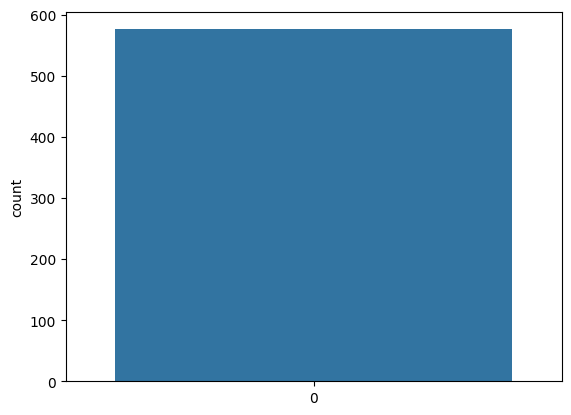

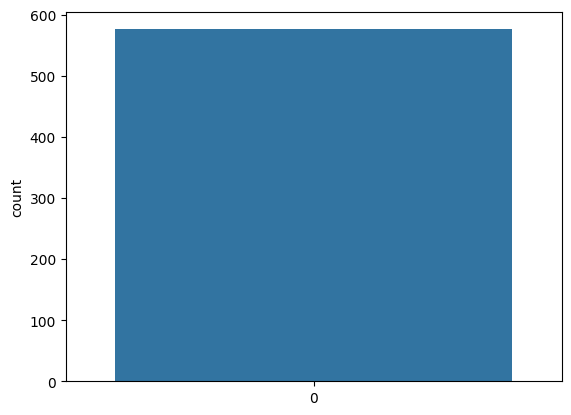

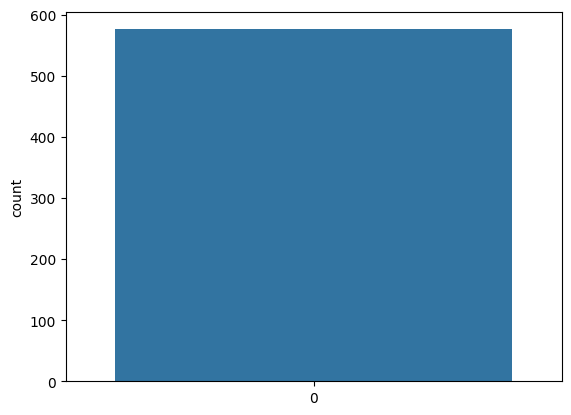

<ipython-input-4-9e36fc73638c>:17: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(instagram_df_train['nums/length username'])


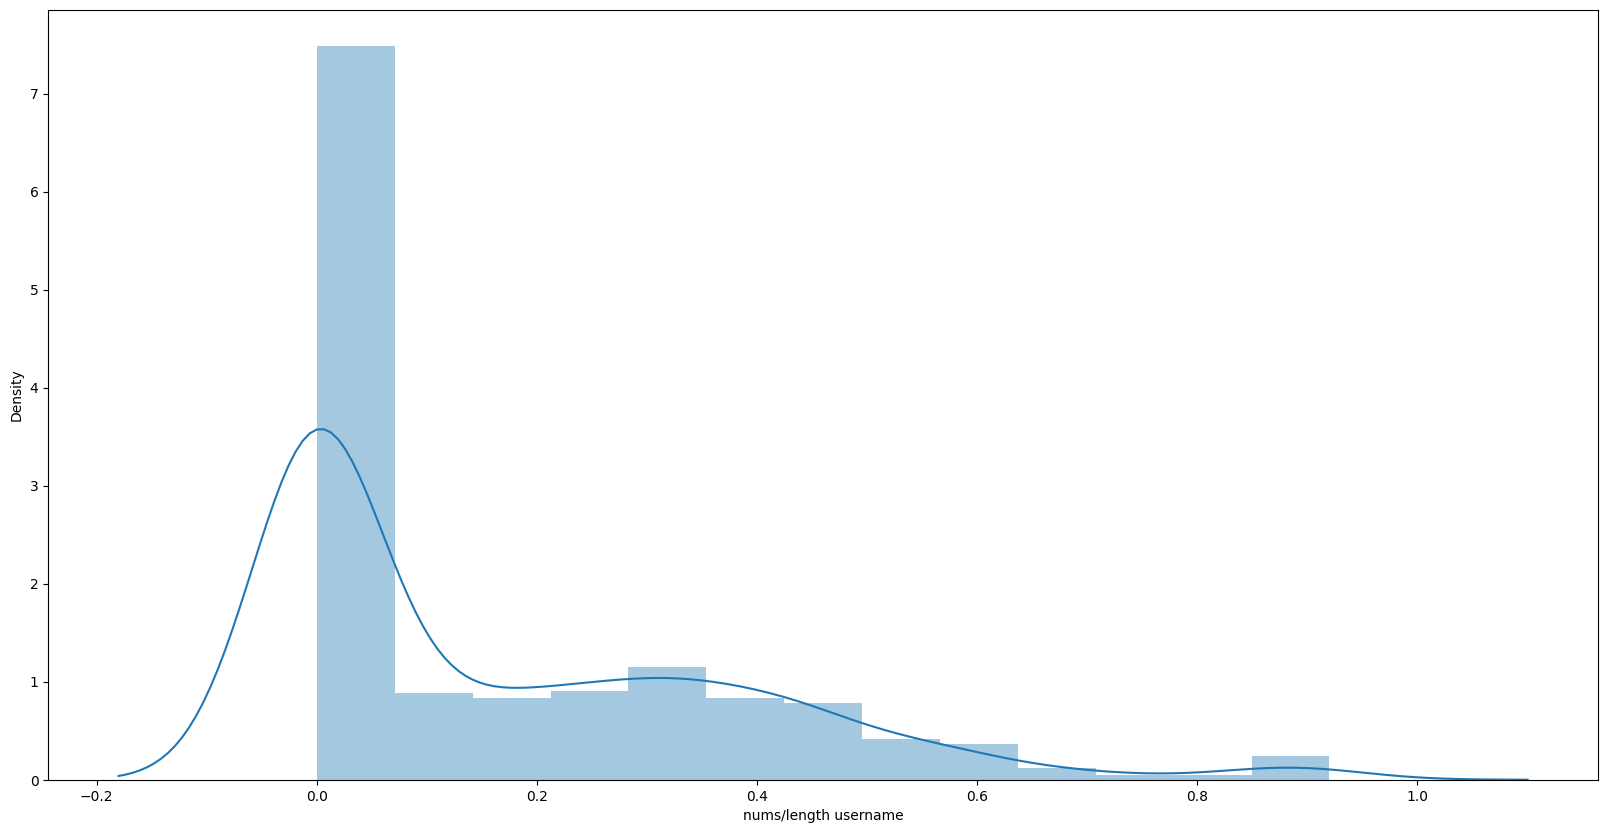

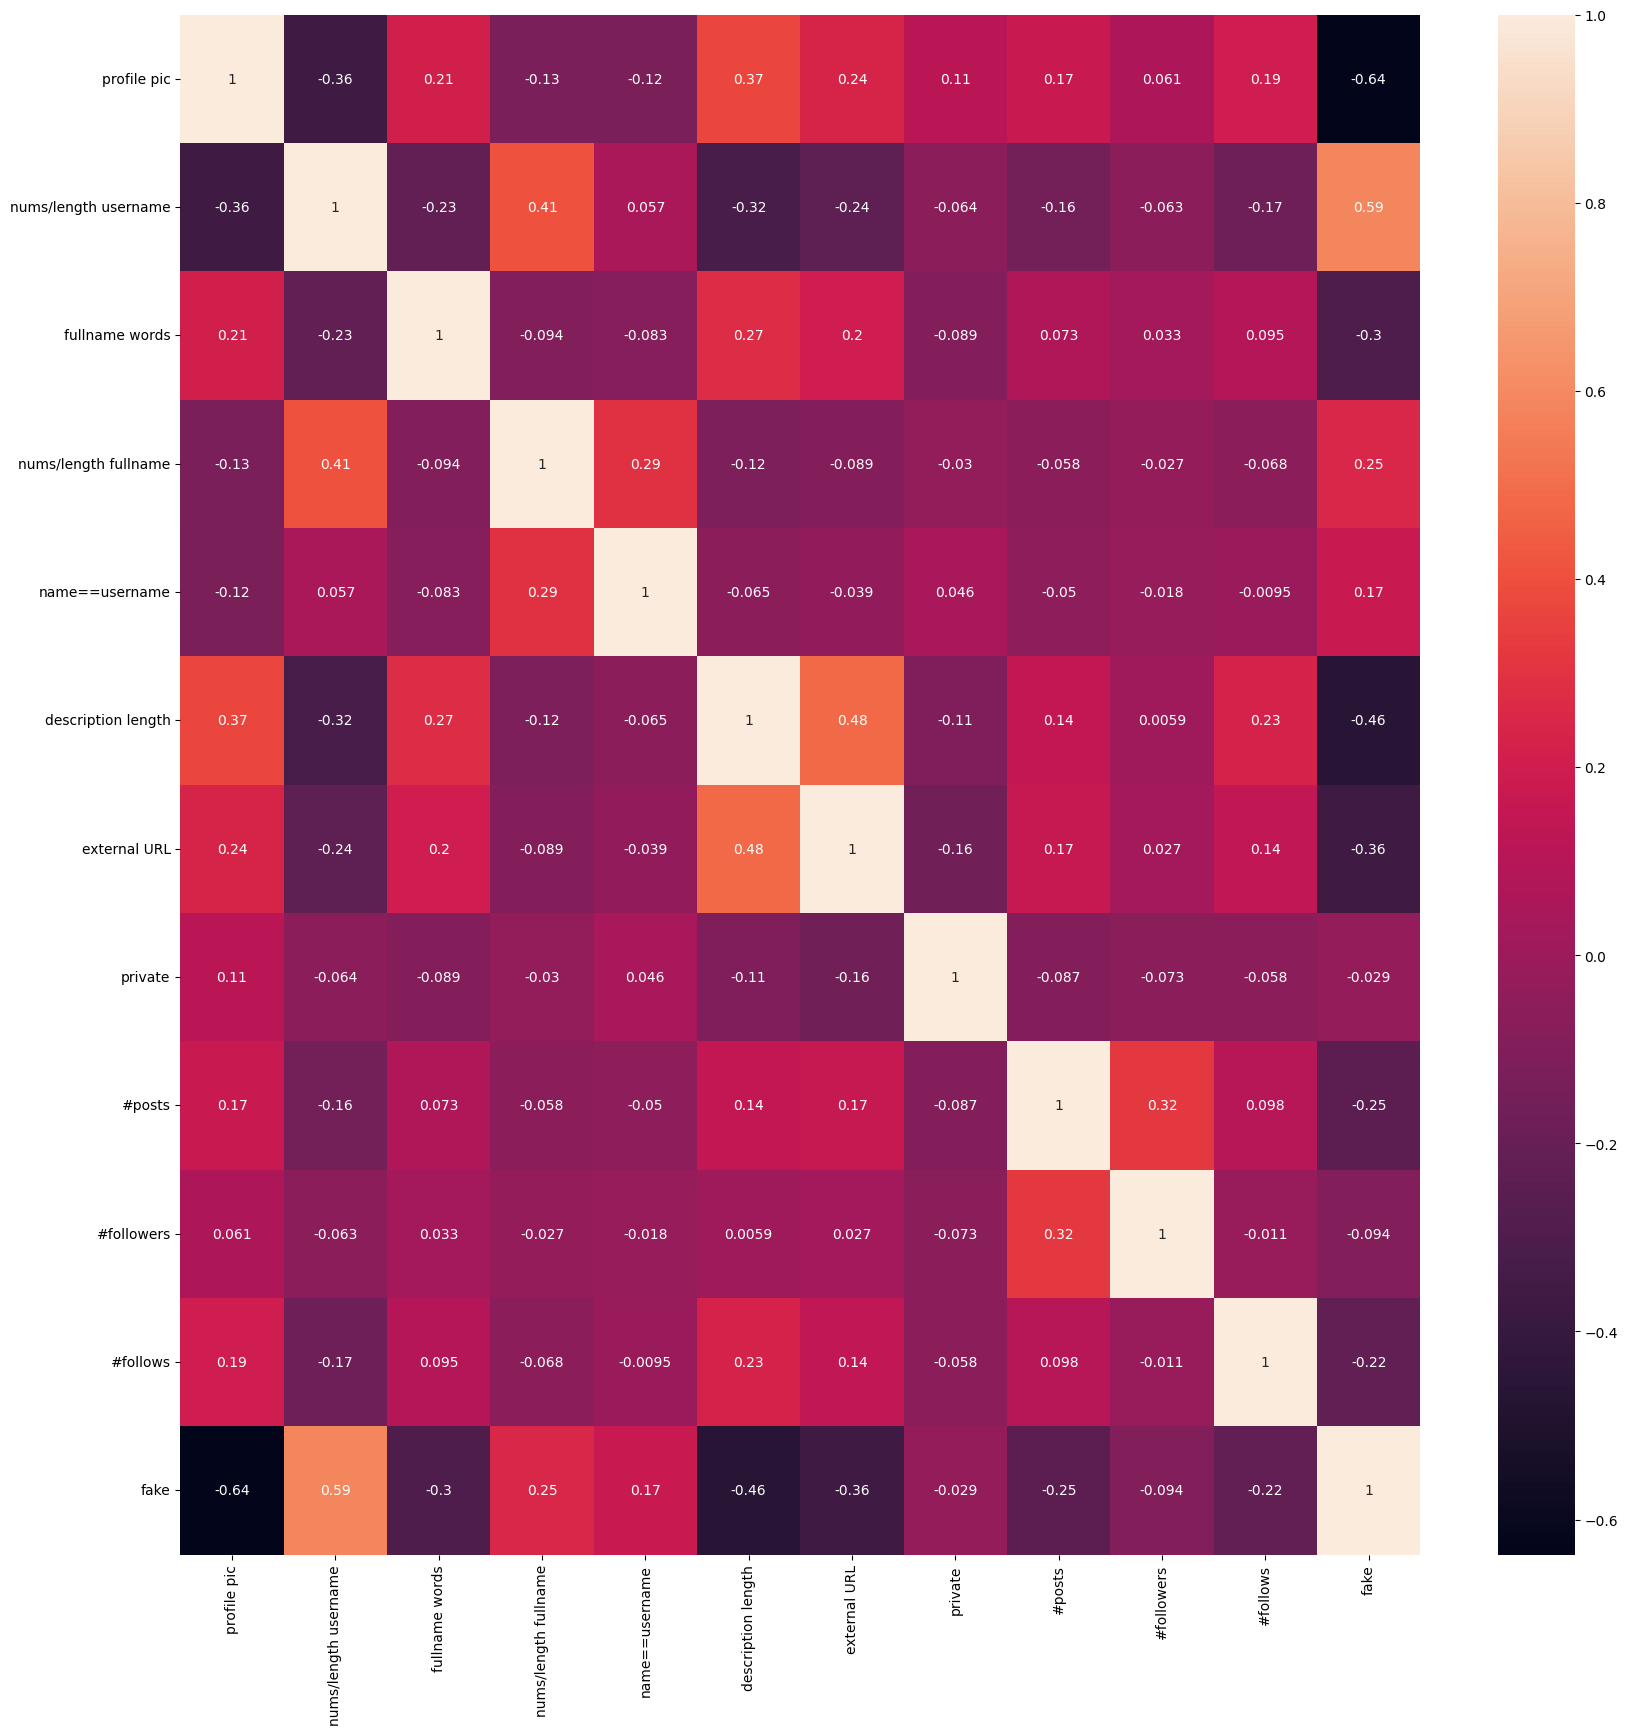

<Axes: ylabel='count'>

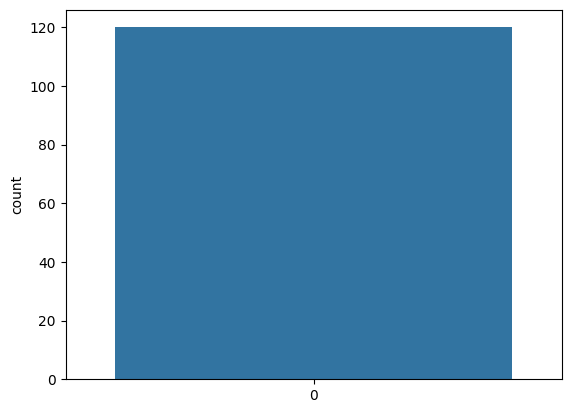

In [ ]:
# Perform Data Visualizations

# Visualize the data
sns.countplot(instagram_df_train['fake'])
plt.show()

# Visualize the private column data
sns.countplot(instagram_df_train['private'])
plt.show()

# Visualize the "profile pic" column data
sns.countplot(instagram_df_train['profile pic'])
plt.show()

# Visualize the data
plt.figure(figsize = (20, 10))
sns.distplot(instagram_df_train['nums/length username'])
plt.show()

# Correlation plot
plt.figure(figsize=(20, 20))
cm = instagram_df_train.corr()
ax = plt.subplot()
# heatmap for correlation matrix
sns.heatmap(cm, annot = True, ax = ax)
plt.show()

sns.countplot(instagram_df_test['fake'])

sns.countplot(instagram_df_test['private'])

sns.countplot(instagram_df_test['profile pic'])

In [ ]:
# Preparing Data to Train the Model

# Training and testing dataset (inputs)
X_train = instagram_df_train.drop(columns = ['fake'])
X_test = instagram_df_test.drop(columns = ['fake'])
X_train

X_test

# Training and testing dataset (Outputs)
y_train = instagram_df_train['fake']
y_test = instagram_df_test['fake']

y_train

y_test

# Scale the data before training the model
from sklearn.preprocessing import StandardScaler, MinMaxScaler
scaler_x = StandardScaler()
X_train = scaler_x.fit_transform(X_train)
X_test = scaler_x.transform(X_test)

y_train = tf.keras.utils.to_categorical(y_train, num_classes = 2)
y_test = tf.keras.utils.to_categorical(y_test, num_classes = 2)

y_train

y_test

# print the shapes of training and testing datasets
X_train.shape, X_test.shape, y_train.shape, y_test.shape

Training_data = len(X_train)/( len(X_test) + len(X_train) ) * 100
Training_data

Testing_data = len(X_test)/( len(X_test) + len(X_train) ) * 100
Testing_data

17.24137931034483

In [ ]:
# Building and Training Deep Training Model

import tensorflow.keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

model = Sequential()
model.add(Dense(50, input_dim=11, activation='relu'))
model.add(Dense(150, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(150, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(25, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(2,activation='softmax'))

model.summary()

model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

epochs_hist = model.fit(X_train, y_train, epochs = 50,  verbose = 1, validation_split = 0.1)

import tensorflow.keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

model = Sequential()
model.add(Dense(50, input_dim=11, activation='relu'))
model.add(Dense(150, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(25, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(25, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(2, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 50)                600       
                                                                 
 dense_1 (Dense)             (None, 150)               7650      
                                                                 
 dropout (Dropout)           (None, 150)               0         
                                                                 
 dense_2 (Dense)             (None, 150)               22650     
                                                                 
 dropout_1 (Dropout)         (None, 150)               0         
                                                                 
 dense_3 (Dense)             (None, 25)                3775      
                                                                 
 dropout_2 (Dropout)         (None, 25)                0

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


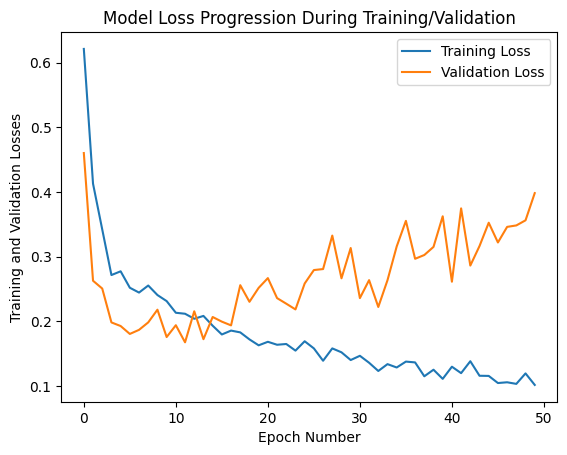

4/4 [==============================] - 0s 4ms/step
              precision    recall  f1-score   support

           0       0.58      0.90      0.71        60
           1       0.78      0.35      0.48        60

    accuracy                           0.62       120
   macro avg       0.68      0.62      0.59       120
weighted avg       0.68      0.62      0.59       120



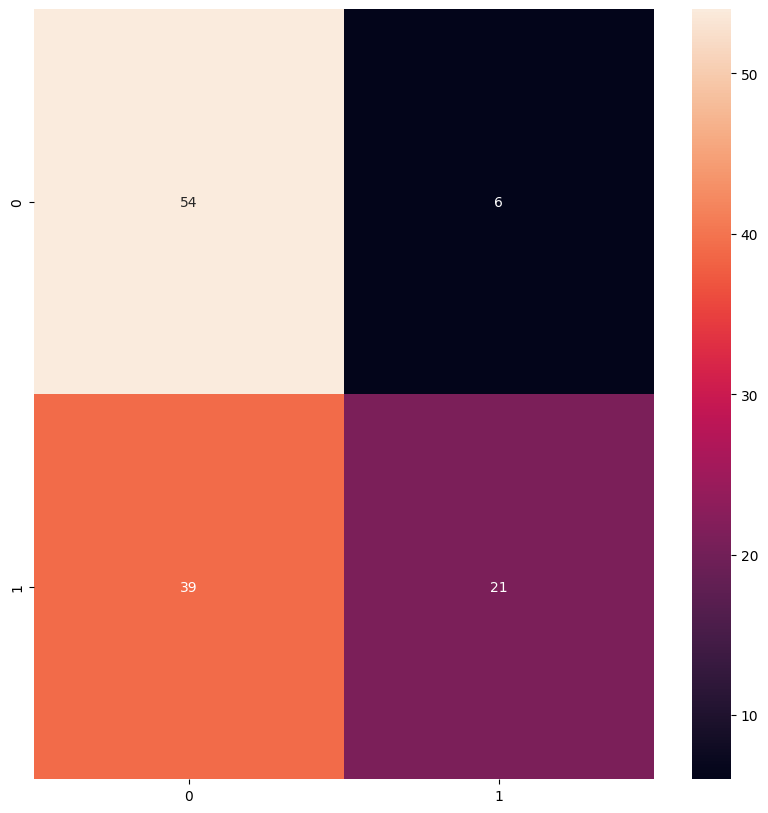

In [ ]:
# Access the Performance of the model

print(epochs_hist.history.keys())

plt.plot(epochs_hist.history['loss'])
plt.plot(epochs_hist.history['val_loss'])

plt.title('Model Loss Progression During Training/Validation')
plt.ylabel('Training and Validation Losses')
plt.xlabel('Epoch Number')
plt.legend(['Training Loss', 'Validation Loss'])
plt.show()

predicted = model.predict(X_test)

predicted_value = []
test = []
for i in predicted:
    predicted_value.append(np.argmax(i))

for i in y_test:
    test.append(np.argmax(i))

print(classification_report(test, predicted_value))

plt.figure(figsize=(10, 10))
cm=confusion_matrix(test, predicted_value)
sns.heatmap(cm, annot=True)
plt.show()




In [ ]:
import numpy as np
from sklearn.linear_model import LinearRegression

# Create a 2D array with 10 parameters
X_test = np.array([[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 1]])

# Reshape the array to have shape (n_samples, n_features)
X_test = X_test.reshape(-1, 11)

# Use the model to make predictions on the input data
predictions = model.predict(X_test)

# Print the predictions
print(predictions)

predicted_value = []
#test = []
for i in predicted:
    predicted_value.append(np.argmax(i))


1/1 [==============================] - 0s 80ms/step
[[0.1928664 0.8071336]]


In [ ]:
# Create a sample input DataFrame
sample_input = pd.DataFrame({
    'profile pic': [1],
    'nums/length username': [0.3],
    'fullname words' :[2],
    'nums/length fullname': [0.2],
    'name==username': [0],
    'description length': [0],
    'external URL': [0],
    'private': [0],
    '#posts': [0],
    '#followers': [46],
    '#follows': [150]
})

# Scale the input data using the same scaler used to scale the training data
sample_input = scaler_x.transform(sample_input)

# Get the model's prediction for the input data
predicted_output = model.predict(sample_input)

# Convert the predicted output probabilities to class labels
predicted_label = np.argmax(predicted_output[0])

# Print the predicted class label
if(predicted_label==0):
  print("No It is not a Fake Accounts")
else:
  print("Yes It is a Fake Accounts")


1/1 [==============================] - 0s 79ms/step
No It is not a Fake Accounts


In [ ]:
sample_input = pd.DataFrame({
    'profile pic': [1],
    'nums/length username': [0.4],
    'fullname words' :[1],
    'nums/length fullname': [0.4],
    'name==username': [1],
    'description length': [0],
    'external URL': [0],
    'private': [1],
    '#posts': [3],
    '#followers': [119],
    '#follows': [151]
})
sample_input = scaler_x.transform(sample_input)
predicted_output = model.predict(sample_input)
predicted_label = np.argmax(predicted_output[0])

if(predicted_label==0):
  print("No It is not a Fake Accounts")
else:
  print("Yes It is a Fake Accounts")

1/1 [==============================] - 0s 37ms/step
No It is not a Fake Accounts
